<a href="https://colab.research.google.com/github/islam-mirajul/Spinach-Recognition-Using-Convolutional-neural-networks/blob/main/Spinach-Recognition(AlexNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("TF Version:", tf.__version__)
import tensorflow_hub as hub
print("TF hub Version:", hub.__version__)
print("GPU", "availabe" if tf.config.list_physical_devices("GPU") else "not availabe")

TF Version: 2.2.0
TF hub Version: 0.8.0
GPU availabe


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6811629245155336800, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12840809804899127095
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3477378496656849795
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18241043223033469219
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
import os
import numpy as np
np.random.seed(777)

import keras
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD, RMSprop

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras.regularizers import l2
from keras.models import load_model

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

In [ ]:
output_classes = 5
batch_size = 64
img_height, img_width = 224,224
input_shape = (img_height, img_width, 3)
epochs = 5
nb_train_samples =2000
nb_test_samples =500

In [ ]:
train_dir = '/content/drive/My Drive/Spinach Classification/Train set'
test_dir = '/content/drive/My Drive/Spinach Classification/Test set'

In [ ]:
for root,dirs,files in os.walk(train_dir):
    print (root, len(files))


print("*"*30)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

/content/drive/My Drive/Spinach Classification/Train set 0
/content/drive/My Drive/Spinach Classification/Train set/Water Spinach 595
/content/drive/My Drive/Spinach Classification/Train set/Malabar Spinach 606
/content/drive/My Drive/Spinach Classification/Train set/Jute Spinach 600
/content/drive/My Drive/Spinach Classification/Train set/Taro Spinach 618
/content/drive/My Drive/Spinach Classification/Train set/Red Spinach 609
******************************
/content/drive/My Drive/Spinach Classification/Test set 0
/content/drive/My Drive/Spinach Classification/Test set/Malabar Spinach 152
/content/drive/My Drive/Spinach Classification/Test set/Red Spinach 152
/content/drive/My Drive/Spinach Classification/Test set/Water Spinach 149
/content/drive/My Drive/Spinach Classification/Test set/Jute Spinach 150
/content/drive/My Drive/Spinach Classification/Test set/Taro Spinach 154


In [ ]:
random_seed = np.random.seed(1142)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 3028 images belonging to 5 classes.
Found 757 images belonging to 5 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64, (11, 11), padding='valid', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(128, (7, 7), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(192, (3, 3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(output_classes))
model.add(BatchNormalization())
model.add(Activation(tf.nn.softmax))

In [ ]:
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)
sgd_opt = SGD(lr=1e-06, momentum=0.0, decay=0.0, nesterov=False)
rmsp_opt = RMSprop(lr=1e-4, decay=0.9)

In [ ]:
model.compile(optimizer= adam_opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 214, 214, 64)      23296     
_________________________________________________________________
batch_normalization_3 (Batch (None, 214, 214, 64)      256       
_________________________________________________________________
activation_3 (Activation)    (None, 214, 214, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 71, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 65, 65, 128)       401536    
_________________________________________________________________
batch_normalization_4 (Batch (None, 65, 65, 128)       512       
_________________________________________________________________
activation_4 (Activation)    (None, 65, 65, 128)      

In [ ]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch = nb_train_samples // batch_size,
  epochs = epochs,
  validation_data = test_generator,
  validation_steps = nb_test_samples // batch_size)

Epoch 1/5
31/31 [==============================] - 2058s 66s/step - loss: 0.6794 - accuracy: 0.8528 - val_loss: 1.7740 - val_accuracy: 0.0000e+00
Epoch 2/5
31/31 [==============================] - 1157s 37s/step - loss: 0.3940 - accuracy: 0.9858 - val_loss: 1.7805 - val_accuracy: 0.3524
Epoch 3/5
31/31 [==============================] - 373s 12s/step - loss: 0.3528 - accuracy: 0.9965 - val_loss: 0.9943 - val_accuracy: 0.2723
Epoch 4/5
31/31 [==============================] - 391s 13s/step - loss: 0.3335 - accuracy: 0.9990 - val_loss: 1.8188 - val_accuracy: 0.0732
Epoch 5/5
31/31 [==============================] - 327s 11s/step - loss: 0.3285 - accuracy: 1.0000 - val_loss: 1.9551 - val_accuracy: 0.3438


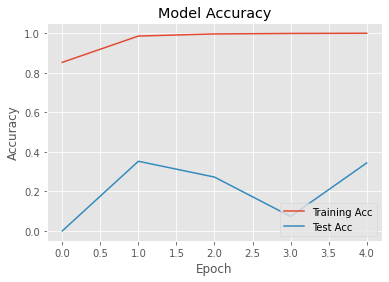

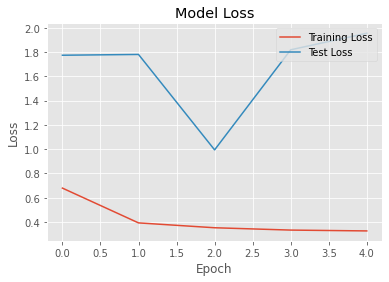

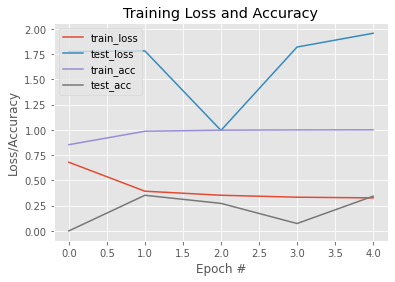

In [ ]:
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Test Acc'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="test_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [ ]:
score = model.evaluate_generator(test_generator, steps=5)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

Validation Score:  1.9573557376861572
Validation Accuracy:  0.0


In [ ]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

12/11 [==============================] - 118s 10s/step
No of errors = 603/757


Confusion Matrix
[[  0   0   0 150   0]
 [  0   0   0 152   0]
 [  0   0   0 152   0]
 [  0   0   0 154   0]
 [  0   0   0 149   0]]


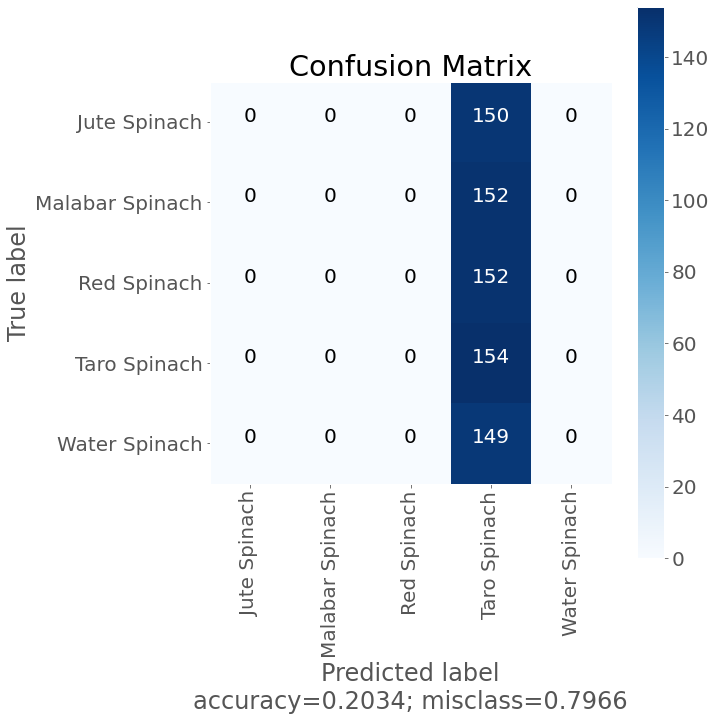

In [ ]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass)) 
plt.figure(figsize=(10,10))


plot_confusion_matrix(cm, classes=labels,
                      title='Confusion Matrix')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred = predicts
y_pred_probabilities=y_pred

y_pred = np.argmax(y_pred,axis = 1) 
y_actual = test_generator.classes

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

confusion_mtx = confusion_matrix(y_actual, y_pred) 
print(confusion_mtx)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))